In [3]:
%load_ext autoreload
%autoreload 2

import sys
from functools import partial

import jax
import jax.numpy as jnp
import h5py

sys.path.append('../../')
from ics import get_delta
from lpt import get_forward_lpt
from plot_utils import plot_cubes, compare_deltas, compare_pow_spec

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
reference_data = "/home/prossello/Documents/TFM/code/fast-mocks-repo/results/N_128_L_180_Z_I_99_Z_F_0_seed_1_steps_40.hdf5"

with h5py.File(reference_data, "r") as f:
    N = f["Header"].attrs["N"]
    L = f["Header"].attrs["L"]
    Z_I = f["Header"].attrs['Z_I']
    Z_F = f["Header"].attrs['Z_F']

    delta_in_ref = jnp.array(f["DeltaDMIn"]["delta"][:])
    delta_fin_ref = jnp.array(f["DeltaDMFin"]["delta"][:])

In [14]:
INPUT_ARG = "DELTA"
R_S = 4
MUSCLE = True
MUSCLE_ITERS = "ONE"
SC_CORRECTION = True

get_forward_lpt_ = partial(
    get_forward_lpt,
    N,
    L,
    Z_I,
    Z_F,
    INPUT_ARG=INPUT_ARG,
    MUSCLE=MUSCLE,
    MUSCLE_ITERS=MUSCLE_ITERS,
    R_S=R_S,
    SC_CORRECTION=SC_CORRECTION
)

lpt_methods = ['LPT1', 'LPT2', 'SC', 'ALPT']

deltas = []
for lpt_method in lpt_methods:
    forward_lpt = get_forward_lpt_(lpt_method)
    deltas.append(forward_lpt(delta_in_ref))


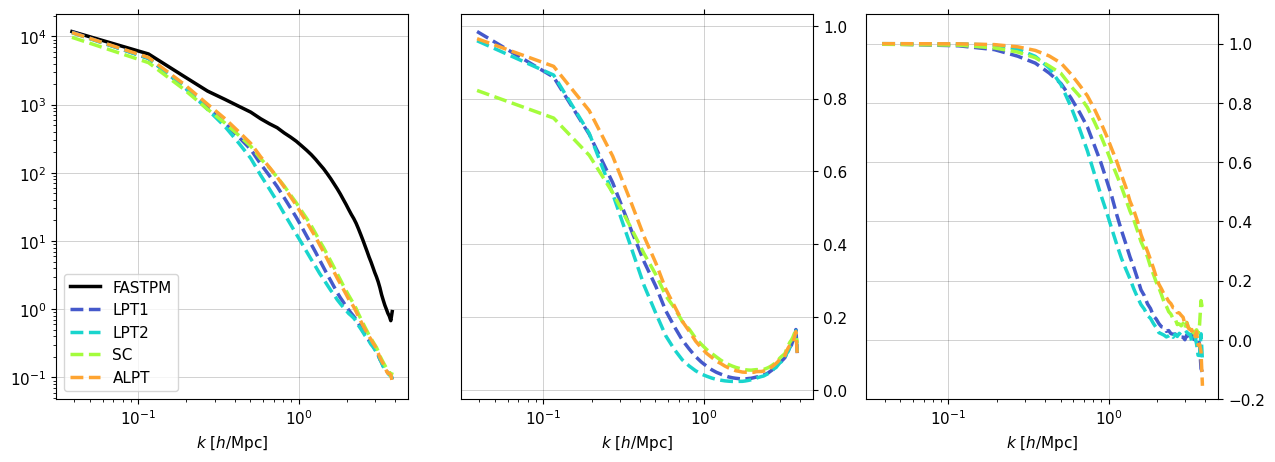

In [15]:
labels = ["FASTPM"] + lpt_methods
fig, axs = compare_pow_spec([delta_fin_ref] + deltas, L, n_bins=50, labels=labels, xlog=True)